## This notebook contains a series 

##### Attributes:

### Weather:
- Station
- Tavg
- PrecipTotal
- StnPressure
- SeaLevel
- ResultSpeed
- ResultDir


## Notebook Contents
- [Location](#location)
- [Trap Date Combination](#trap date)
- [Weather](#weather)
- [Time Lags](#time lag)
- [Condensed Dataset](#condensed dataset)
- [Species](#species)
- [Yi - target development](#yi)
- [CSV](#csv)

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [44]:
abatement_historical = pd.read_csv('./Data/abatement_calculations.csv')

In [45]:
abatement_historical.set_index('country', inplace=True)
abatement_historical = abatement_historical.T

In [49]:
abatement_yoy_change = abatement_historical.diff()
abatement_yoy_change.drop('1990', inplace=True)

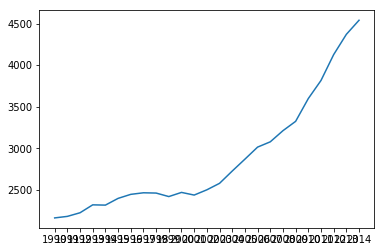

In [47]:
plt.plot(abatement_historical.loc[:,'World']);

In [4]:
top_10 = abatement_historical.sort_values('2014', ascending=False)[0:10]

In [5]:
top_10.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
7,China,197.209323,190.067242,197.754097,229.011131,251.580640,286.519754,291.545496,290.374046,313.397953,...,523.488766,571.018648,599.442207,712.541398,763.582709,908.494910,884.375057,1118.031475,1199.319003,1361.197023
22,Norway,3668.375438,3618.847800,5934.299000,5954.467200,3523.339286,3281.041694,2080.545000,2970.803333,3589.911563,...,2297.869608,1897.625447,1514.813088,2158.275346,408.589863,331.362588,390.493059,652.301634,552.019423,573.354574
5,Canada,233.588425,224.063758,237.567369,225.734206,221.349320,234.694313,259.831004,273.578820,273.650891,...,307.427314,301.889839,330.891202,355.923481,357.827061,347.005520,357.015972,372.500906,384.917912,381.999645
35,United States,297.694249,281.180189,270.727375,294.002858,275.966261,314.142550,350.481600,346.378575,307.656503,...,283.771008,300.432809,277.459249,291.990815,307.937104,313.997128,368.793449,345.106246,366.565363,376.853865
4,Brazil,498.822545,508.578979,519.888703,627.472911,645.963116,522.499322,506.650645,515.552908,523.202597,...,396.727435,386.381226,429.039524,365.660548,468.029155,381.564353,427.385829,381.094705,348.394346,339.264127


In [6]:
top_10.set_index('country', inplace=True)

In [7]:
top_10.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,,,,,,,
China,197.209323,190.067242,197.754097,229.011131,251.580640,286.519754,291.545496,290.374046,313.397953,291.838741,...,523.488766,571.018648,599.442207,712.541398,763.582709,908.494910,884.375057,1118.031475,1199.319003,1361.197023
Norway,3668.375438,3618.847800,5934.299000,5954.467200,3523.339286,3281.041694,2080.545000,2970.803333,3589.911563,3304.351145,...,2297.869608,1897.625447,1514.813088,2158.275346,408.589863,331.362588,390.493059,652.301634,552.019423,573.354574
Canada,233.588425,224.063758,237.567369,225.734206,221.349320,234.694313,259.831004,273.578820,273.650891,285.767548,...,307.427314,301.889839,330.891202,355.923481,357.827061,347.005520,357.015972,372.500906,384.917912,381.999645
United States,297.694249,281.180189,270.727375,294.002858,275.966261,314.142550,350.481600,346.378575,307.656503,285.948597,...,283.771008,300.432809,277.459249,291.990815,307.937104,313.997128,368.793449,345.106246,366.565363,376.853865
Brazil,498.822545,508.578979,519.888703,627.472911,645.963116,522.499322,506.650645,515.552908,523.202597,420.832134,...,396.727435,386.381226,429.039524,365.660548,468.029155,381.564353,427.385829,381.094705,348.394346,339.264127


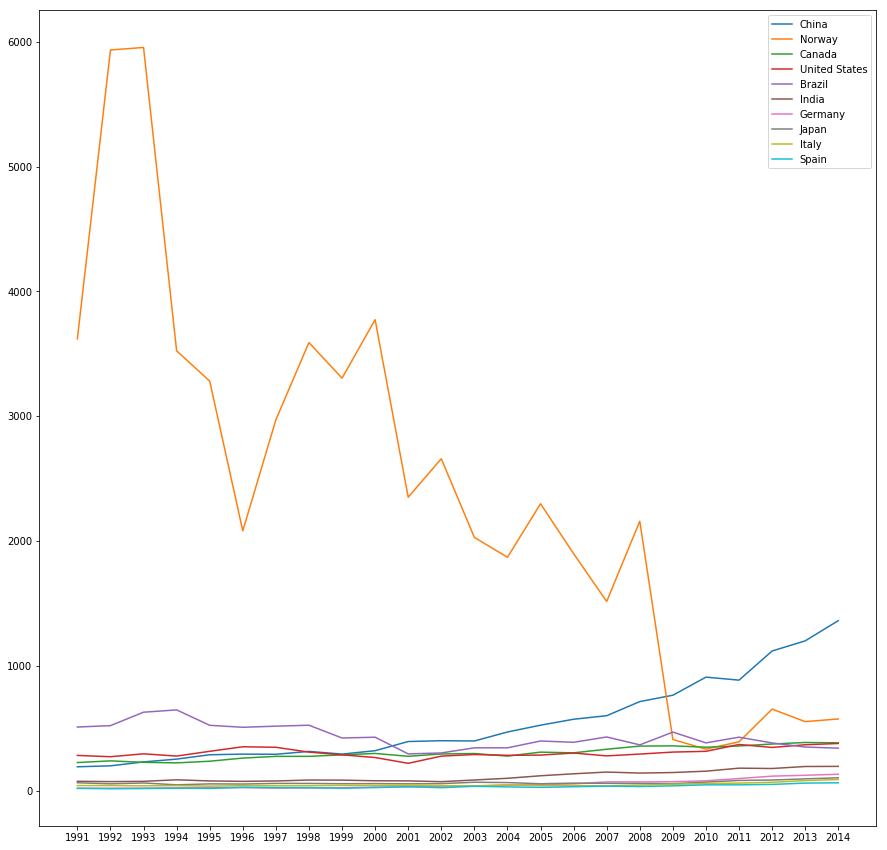

In [8]:
plt.figure(figsize=(15, 15));
for i in range(len(top_10)):
    plt.plot(top_10.iloc[i, 1:], label=top_10.index[i]);
plt.legend();

In [9]:
top_10_nn = top_10.drop(labels='Norway')

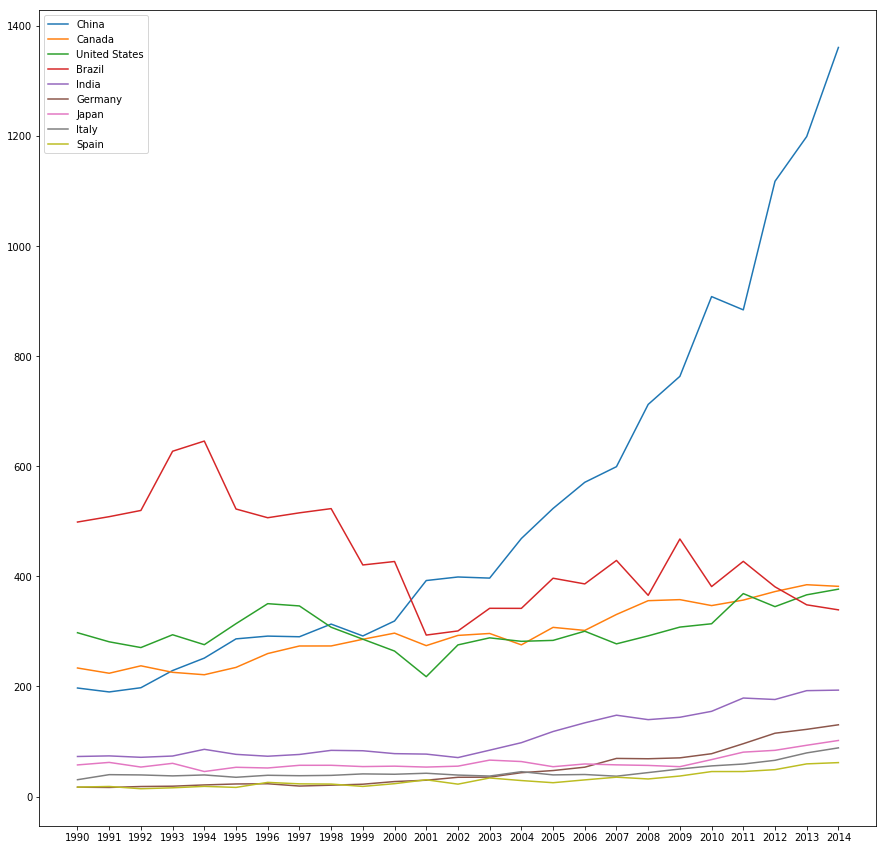

In [10]:
plt.figure(figsize=(15, 15));
for i in range(len(top_10_nn)):
    plt.plot(top_10_nn.iloc[i, :], label=top_10_nn.index[i]);
plt.legend();

- Group countries together that are similar in trend
- "Cohort analysis"

### ARIMA

- build a dataframe where features are lagged timepoints
- target is the next feature in the progression  
  
- specify priors on all coefficients
- specify priors on variance of data
- plug things into the model 
- follow pymc3 lesson

- goal is actually a posterior predictive
- pyflux provides uncertainty bounds (UL + LL)
- for a highly generalized bayesian regression try pymc3
    - you  need to specify priors and distributions
    - begin with something relatively uninformative (broad gaussian, uniform, etc.) 
    
1. write out an equation, which model inteded (ex. regression + variance)
2. specify priors for each coefficient, prior on variance
    - pymc3 this means creating new objects 
3. take existing objects/variables that contain priors and build a likelihood distribution with observed data
    - prior variables act as parameters
    - MCMC
4. estimate y-hat and save values
    - this is where we capture variance
    - write out a function to pull samples from these distributions
    - codify the samples pulled, **construct a distribution of y-hat** fitting to obtain bounds and represent uncertainty or anticipated variance
        - we can use this to set a confidence interval
    - combining these observations to understand uncertainty is where this gets shaky

In [14]:
abatement_time_series = abatement_historical.T

In [21]:
abatement_time_series.columns = abatement_time_series.iloc[0,:]
abatement_time_series.drop('country', inplace=True)

In [22]:
abatement_time_series

country,Algeria,Argentina,Australia,Belgium,Brazil,Canada,Chile,China,Colombia,France,...,South Africa,Spain,Sweden,Thailand,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Uzbekistan
1990,0.202225,19.9962,16.0302,0.511173,498.823,233.588,12.6144,197.209,41.6759,10.4974,...,3.13409,17.1074,9.44513,3.90868,26.8465,11.9388,0,6.27589,297.694,6.37842
1991,0.423816,17.4816,17.5863,0.554798,508.579,224.064,20.9216,190.067,41.0019,12.1646,...,4.164,18.3134,8.28154,3.73366,24.2177,13.1512,0,5.40814,281.18,5.97541
1992,0.279782,21.8484,17.0252,0.60915,519.889,237.567,34.7957,197.754,30.3603,12.3338,...,2.28446,14.1979,9.71518,3.23994,28.4644,8.2606,0,6.48559,270.727,6.84418
1993,0.473316,22.734,18.0926,0.55569,627.473,225.734,32.9561,229.011,39.5106,9.05038,...,1.61832,15.8853,10.685,2.72693,37.1139,12.5394,0,5.2004,294.003,8.65137
1994,0.215557,25.0232,17.3497,0.661508,645.963,221.349,27.3786,251.581,44.7805,10.8064,...,2.80282,18.5013,8.05858,3.33916,32.1434,13.3554,0,6.08559,275.966,7.80651
1995,0.264797,23.8593,16.8152,0.701022,522.499,234.694,27.1268,286.52,44.6299,10.7273,...,2.0452,16.6226,8.96479,5.13921,36.2946,10.9875,0,5.81574,314.143,5.78622
1996,0.17252,19.3271,17.2085,0.664418,506.651,259.831,21.803,291.545,57.9613,10.0215,...,3.93633,25.7424,8.40598,6.15845,42.1715,7.9139,0,4.85778,350.482,6.99713
1997,0.0999734,24.5348,18.7014,0.625552,515.553,273.579,26.6828,290.374,36.8575,9.1448,...,5.32608,23.0702,9.31378,5.80353,39.3925,8.65799,0,5.36198,346.379,6.00027
1998,0.26495,22.4641,18.0363,0.742884,523.203,273.651,17.9683,313.398,38.9187,11.2377,...,4.93976,22.6857,10.2419,4.20279,41.9694,14.1784,0,6.44782,307.657,6.30412
1999,0.254168,16.5947,18.708,0.711241,420.832,285.768,13.8256,291.839,50.543,11.8364,...,3.95366,18.4246,8.72065,3.33142,30.5948,12.6787,0,7.82732,285.949,6.25046
